In [310]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn as sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

# Define the problem and perform Exploratory Data Analysis 

In [311]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [312]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [313]:
rcParams['figure.figsize'] = 15,8

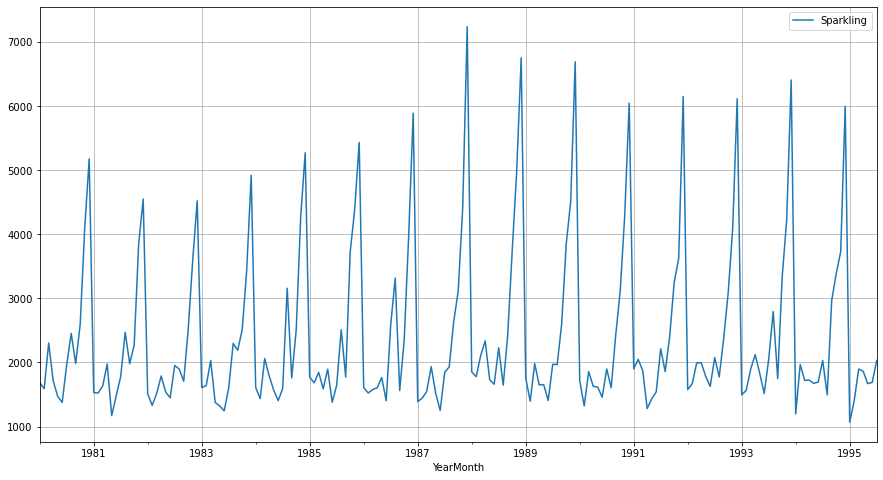

In [314]:
df.plot(grid=True);

In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


In [316]:
df.shape

(187, 1)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


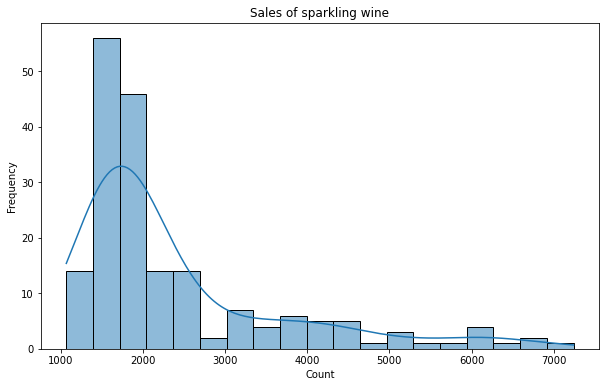

In [318]:
# Data visualization, EDA
plt.figure(figsize=(10, 6))
sns.histplot(df['Sparkling'], kde=True)
plt.title('Sales of sparkling wine')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

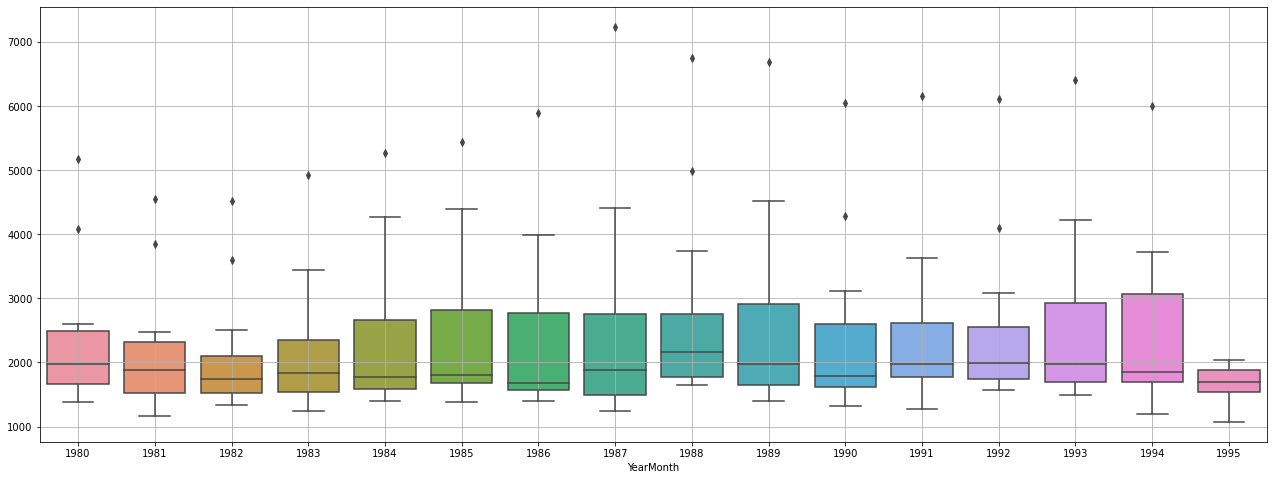

In [319]:
#Yearly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

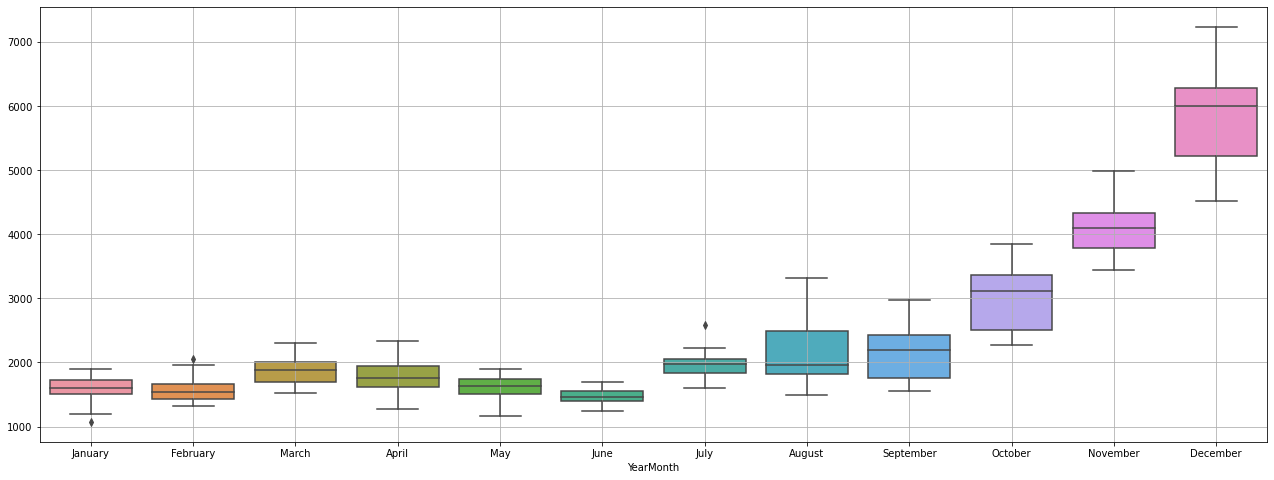

In [320]:
#Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [321]:
#Plot a graph of monthly sales across years.
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


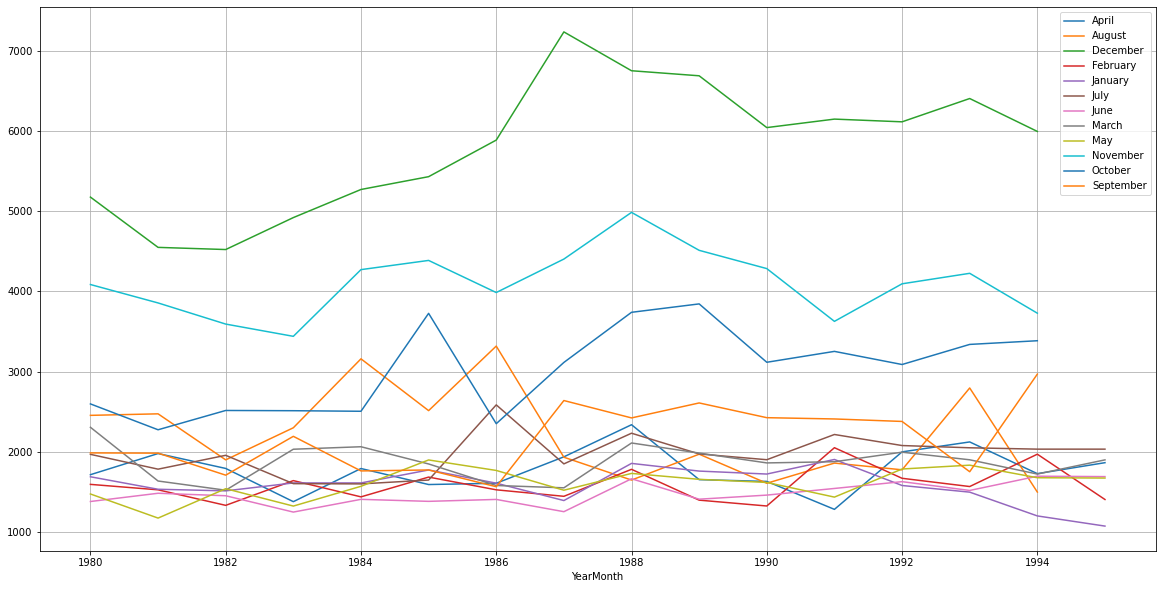

In [322]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

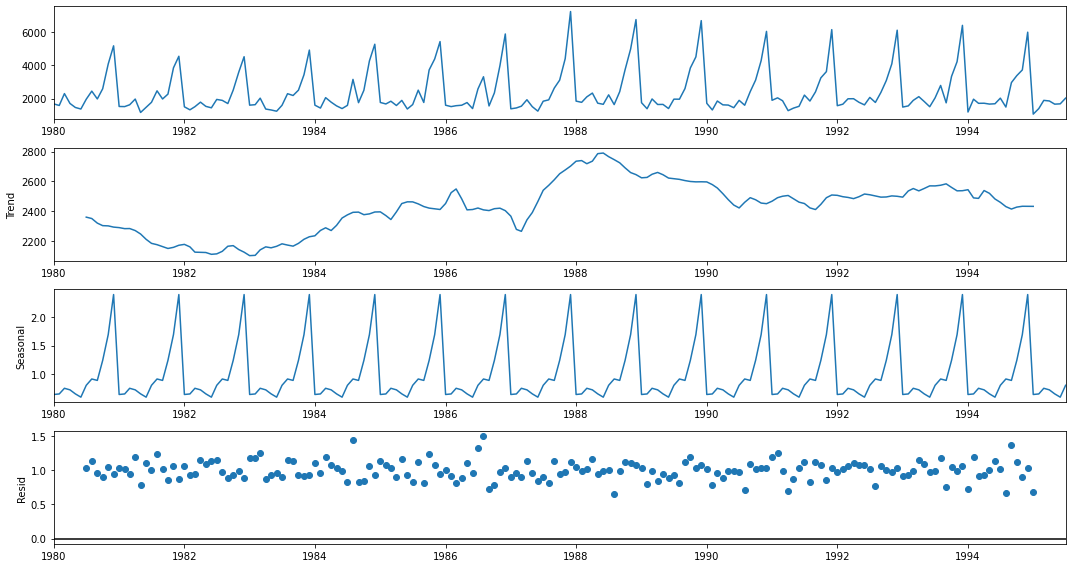

In [323]:
#Decomposition of time series
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

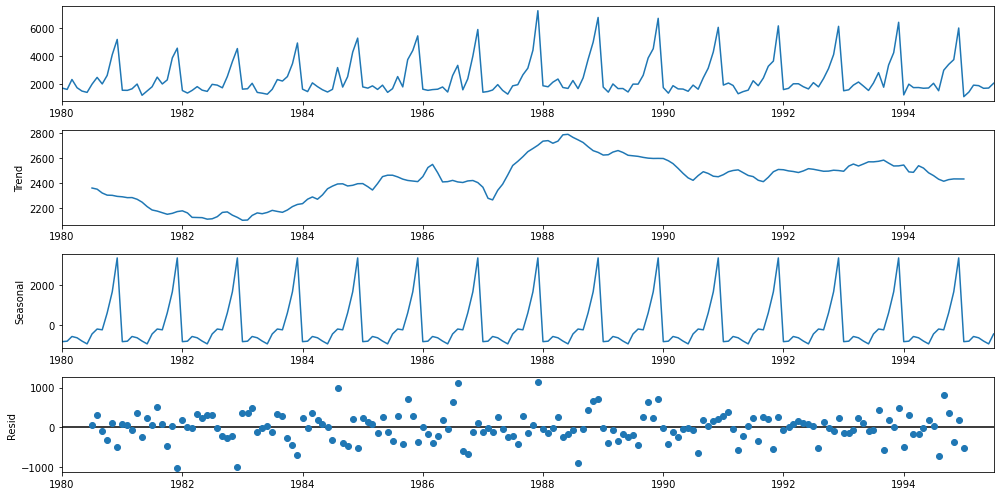

In [324]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [325]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.26
1980-02-01    -830.35
1980-03-01    -592.36
1980-04-01    -658.49
1980-05-01    -824.42
1980-06-01    -967.43
1980-07-01    -465.50
1980-08-01    -214.33
1980-09-01    -254.68
1980-10-01     599.77
1980-11-01    1675.07
1980-12-01    3386.98
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01     70.84
1980-08-01    316.00
1980-09-01    -81.86
1980-10-01   -307.35
1980-11-01    109.89
1980-12-01   -501.78
Name: resid, dtype: float64 



# Data Pre-processing

In [326]:
# Check for missing values
print(df.isnull())
print(df.isnull().sum())  # Count of missing values per column

            Sparkling
YearMonth            
1980-01-01      False
1980-02-01      False
1980-03-01      False
1980-04-01      False
1980-05-01      False
...               ...
1995-03-01      False
1995-04-01      False
1995-05-01      False
1995-06-01      False
1995-07-01      False

[187 rows x 1 columns]
Sparkling    0
dtype: int64


In [327]:
# Check for NaNs
print(df.isna().sum())

# Check for infinities
print(np.isinf(df).sum())

Sparkling    0
dtype: int64
Sparkling    0
dtype: int64


In [328]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [329]:
#Split the data into train and test and plot the training and test data.
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [330]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [331]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-06-01       1457
1990-07-01       1899
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116 

First few rows of Test Data 
             Sparkling
YearMonth            
1990-11-01       4286
1990-12-01       6047
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



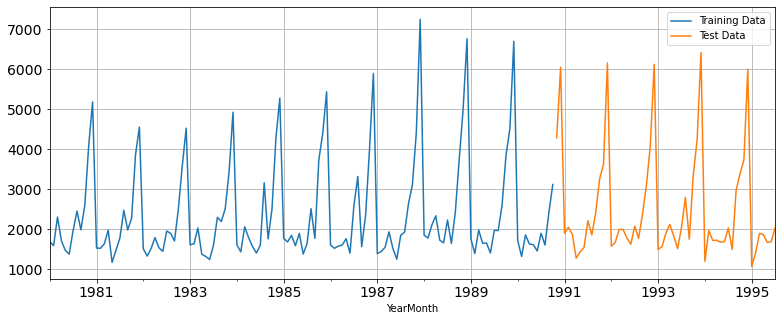

In [332]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## Model 1 - Linear Regression

In [333]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [334]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [335]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-01       4286    43
1990-12-01       6047    44
1991-01-01       1902    45
1991-02-01       2049    46
1991-03-01       1874    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    95
1995-04-01       1862    96
1995-05-01       1670    97
1995-06-01       1688    98
1995-07-01       2031    99 



In [336]:
from sklearn.linear_model import LinearRegression

In [337]:
lr = LinearRegression()

In [338]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

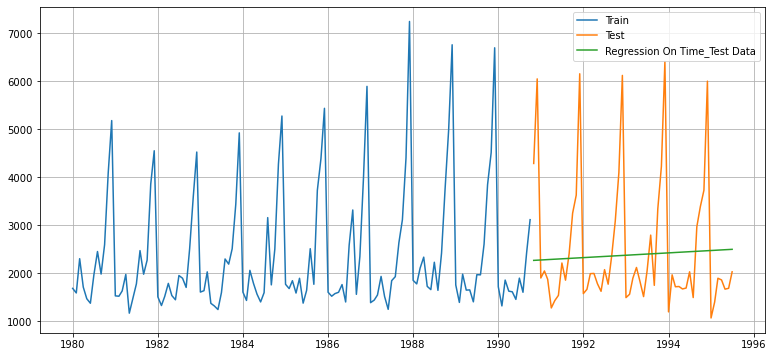

In [339]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [340]:
#Defining the accuracy metrics.
from sklearn import metrics

In [341]:
#Model Evaluation
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1374.55


In [342]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['Linear Regression Model'])
resultsDf

,RMSE
Linear Regression Model,1374.550202


## Method 2 - Simple Average 

In [343]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [344]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1990-11-01,4286,2361.276923
1990-12-01,6047,2361.276923
1991-01-01,1902,2361.276923
1991-02-01,2049,2361.276923
1991-03-01,1874,2361.276923


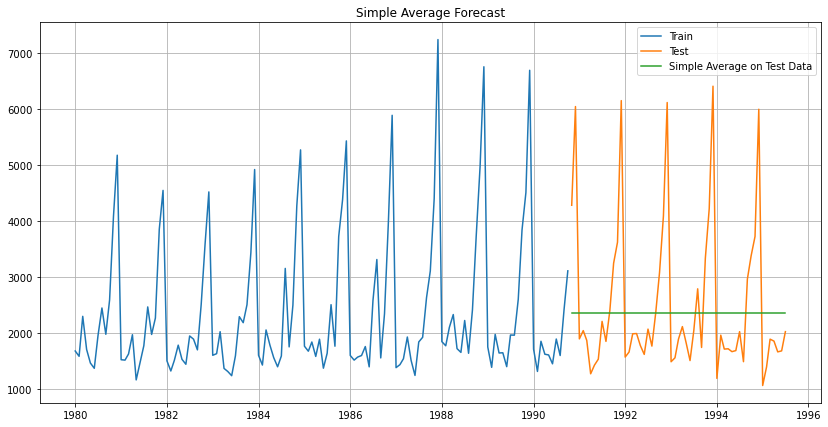

In [345]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [346]:
#Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [347]:
resultsDf1 = pd.DataFrame({'RMSE': rmse_model2_test}
                           ,index=['Simple Average Model :'])

pd.concat([resultsDf,resultsDf1])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717


## Method 3 - Moving average 

In [348]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [349]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


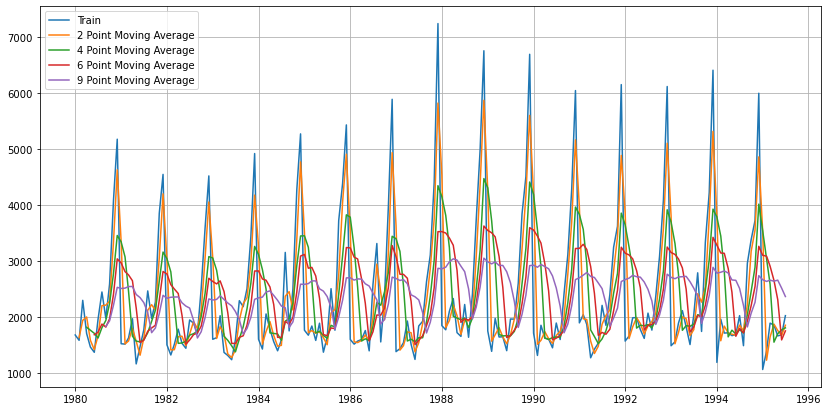

In [350]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [351]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

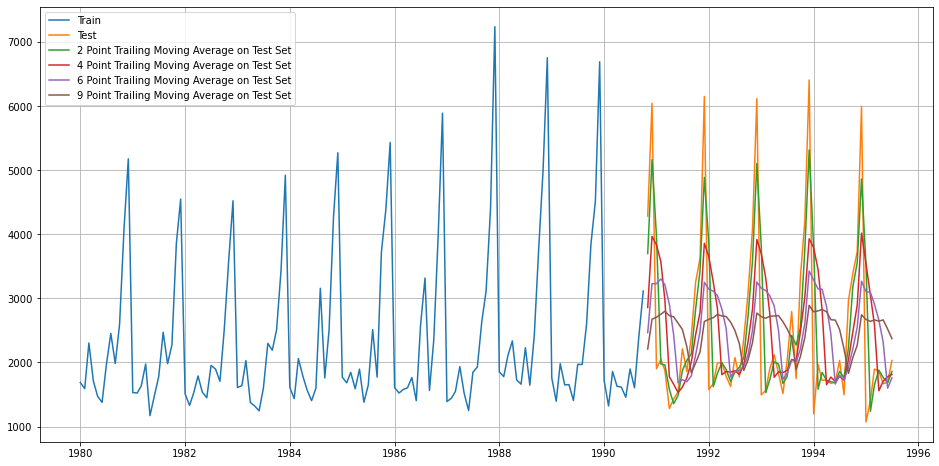

In [352]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [353]:
#Model evaluation
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [354]:
resultsDf2 = pd.DataFrame({'RMSE': rmse_model4_test_2}
                           ,index=['Moving Average Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937


## Method 4 - Exponential Models 

#### Single Exponential Smoothing 

In [355]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [356]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [357]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [358]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.06994041702168571,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2108.034139790532,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [359]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-01    2429.666331
1990-12-01    2429.666331
1991-01-01    2429.666331
1991-02-01    2429.666331
1991-03-01    2429.666331
1991-04-01    2429.666331
1991-05-01    2429.666331
1991-06-01    2429.666331
1991-07-01    2429.666331
1991-08-01    2429.666331
1991-09-01    2429.666331
1991-10-01    2429.666331
1991-11-01    2429.666331
1991-12-01    2429.666331
1992-01-01    2429.666331
1992-02-01    2429.666331
1992-03-01    2429.666331
1992-04-01    2429.666331
1992-05-01    2429.666331
1992-06-01    2429.666331
1992-07-01    2429.666331
1992-08-01    2429.666331
1992-09-01    2429.666331
1992-10-01    2429.666331
1992-11-01    2429.666331
1992-12-01    2429.666331
1993-01-01    2429.666331
1993-02-01    2429.666331
1993-03-01    2429.666331
1993-04-01    2429.666331
1993-05-01    2429.666331
1993-06-01    2429.666331
1993-07-01    2429.666331
1993-08-01    2429.666331
1993-09-01    2429.666331
1993-10-01    2429.666331
1993-11-01    2429.666331
1993-12-01    2429.666331
1994-01-01  

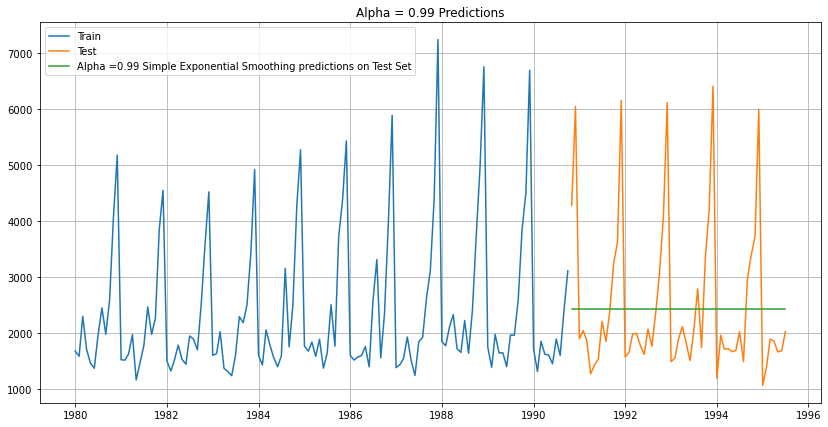

In [360]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [361]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [362]:
ses_single = (mean_squared_error(test.values,SES_predict.values,squared=False))
print('SES RMSE:',ses_single)


SES RMSE: 1363.7022506177946


In [363]:
resultsDf3 = pd.DataFrame({'RMSE': ses_single}
                           ,index=['Single Exponential Smoothening Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251


##### Double Exponential Smoothing 

In [364]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07614001422051413, 'smoothing_trend': 0.07614001422051413, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.800070851357, 'initial_trend': 2.7690564419590373, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [365]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-01    2406.739632
1990-12-01    2390.171048
1991-01-01    2373.602464
1991-02-01    2357.033880
1991-03-01    2340.465296
1991-04-01    2323.896712
1991-05-01    2307.328128
1991-06-01    2290.759544
1991-07-01    2274.190960
1991-08-01    2257.622376
1991-09-01    2241.053792
1991-10-01    2224.485208
1991-11-01    2207.916624
1991-12-01    2191.348040
1992-01-01    2174.779456
1992-02-01    2158.210873
1992-03-01    2141.642289
1992-04-01    2125.073705
1992-05-01    2108.505121
1992-06-01    2091.936537
1992-07-01    2075.367953
1992-08-01    2058.799369
1992-09-01    2042.230785
1992-10-01    2025.662201
1992-11-01    2009.093617
1992-12-01    1992.525033
1993-01-01    1975.956449
1993-02-01    1959.387865
1993-03-01    1942.819281
1993-04-01    1926.250697
1993-05-01    1909.682113
1993-06-01    1893.113529
1993-07-01    1876.544946
1993-08-01    1859.976362
1993-09-01    1843.407778
1993-10-01    1826.839194
1993-11-01    1810.270610
1993-12-01    1793.702026
1994-01-01  

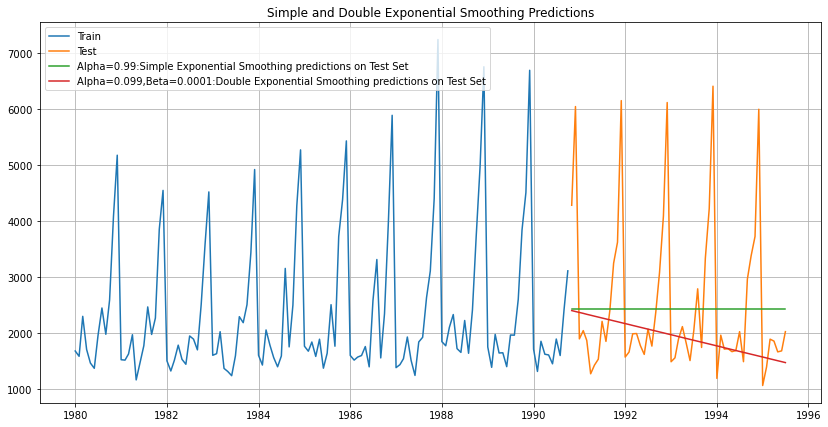

In [366]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [459]:
des_single = (mean_squared_error(test.values,DES_predict.values, squared=False))
              
print('DES RMSE:', des_single)

DES RMSE: 1472.2536317326917


In [460]:
resultsDf4 = pd.DataFrame({'RMSE': des_single}
                           ,index=['Double Exponential Smoothening Model'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632


#### Triple Exponential Smoothing - Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [461]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07569306568824088, 'smoothing_trend': 0.03243079354510322, 'smoothing_seasonal': 0.47913593977130997, 'damping_trend': nan, 'initial_level': 2356.5265323809604, 'initial_trend': -0.7790797250530854, 'initial_seasons': array([-636.24268485, -722.99133041, -398.6335455 , -473.44377819,
       -808.44186271, -815.36460194, -384.23726708,   72.99614943,
       -237.4576044 ,  272.31934737, 1541.39471434, 2590.08838066]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [462]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-01    4497.227451
1990-12-01    6550.067144
1991-01-01    1620.057193
1991-02-01    1324.953921
1991-03-01    1806.743576
1991-04-01    1660.977944
1991-05-01    1567.775979
1991-06-01    1383.385229
1991-07-01    1904.698547
1991-08-01    1762.048314
1991-09-01    2403.586154
1991-10-01    3535.228751
1991-11-01    4490.836280
1991-12-01    6543.675973
1992-01-01    1613.666022
1992-02-01    1318.562750
1992-03-01    1800.352404
1992-04-01    1654.586773
1992-05-01    1561.384808
1992-06-01    1376.994057
1992-07-01    1898.307376
1992-08-01    1755.657143
1992-09-01    2397.194983
1992-10-01    3528.837580
1992-11-01    4484.445108
1992-12-01    6537.284801
1993-01-01    1607.274851
1993-02-01    1312.171578
1993-03-01    1793.961233
1993-04-01    1648.195601
1993-05-01    1554.993636
1993-06-01    1370.602886
1993-07-01    1891.916204
1993-08-01    1749.265971
1993-09-01    2390.803812
1993-10-01    3522.446408
1993-11-01    4478.053937
1993-12-01    6530.893630
1994-01-01  

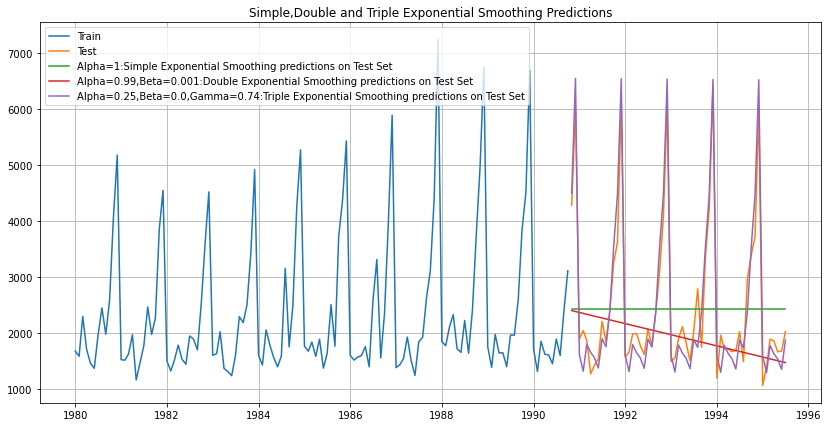

In [463]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [464]:
tes = (mean_squared_error(test.values,TES_predict.values,squared=False))

print('TES RMSE:',tes)

TES RMSE: 366.8591560427043


In [465]:
resultsDf5 = pd.DataFrame({'RMSE': tes}
                           ,index=['Triple Exponential Smoothening Model Additive:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632
Triple Exponential Smoothening Model Additive:,366.859156


#### Triple Exponential Smoothing - Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [466]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571432471504627, 'smoothing_trend': 0.06489794789923221, 'smoothing_seasonal': 0.3765611795178487, 'damping_trend': nan, 'initial_level': 2356.5416847960546, 'initial_trend': -9.182360270735833, 'initial_seasons': array([0.71216394, 0.67829895, 0.89649052, 0.79723125, 0.64100433,
       0.63985644, 0.86674058, 1.1133546 , 0.89819179, 1.18511974,
       1.83459596, 2.32779881]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [467]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-11-01    4327.606504
1990-12-01    6208.854292
1991-01-01    1621.602282
1991-02-01    1379.868255
1991-03-01    1791.914776
1991-04-01    1679.449968
1991-05-01    1560.820999
1991-06-01    1371.904364
1991-07-01    1874.422935
1991-08-01    1824.445953
1991-09-01    2288.016973
1991-10-01    3240.908139
1991-11-01    4185.628599
1991-12-01    6004.598944
1992-01-01    1568.109086
1992-02-01    1334.223872
1992-03-01    1732.476545
1992-04-01    1623.587807
1992-05-01    1508.760391
1992-06-01    1326.017456
1992-07-01    1811.552749
1992-08-01    1763.080527
1992-09-01    2210.842975
1992-10-01    3131.285334
1992-11-01    4043.650693
1992-12-01    5800.343597
1993-01-01    1514.615890
1993-02-01    1288.579490
1993-03-01    1673.038313
1993-04-01    1567.725646
1993-05-01    1456.699784
1993-06-01    1280.130548
1993-07-01    1748.682562
1993-08-01    1701.715101
1993-09-01    2133.668978
1993-10-01    3021.662529
1993-11-01    3901.672788
1993-12-01    5596.088249
1994-01-01  

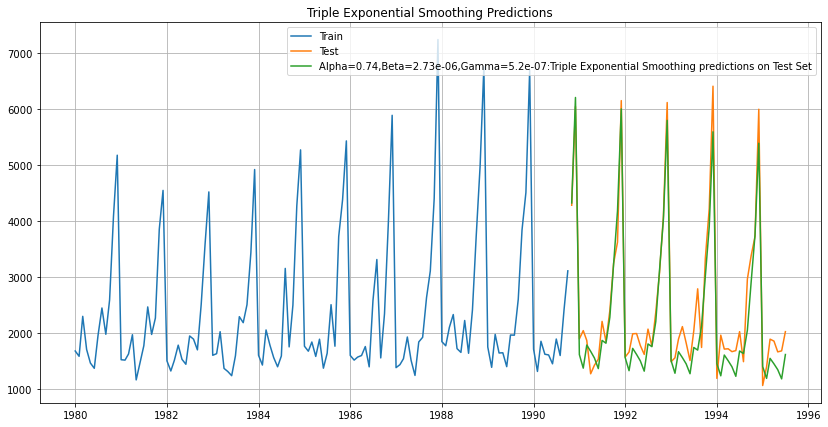

In [468]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

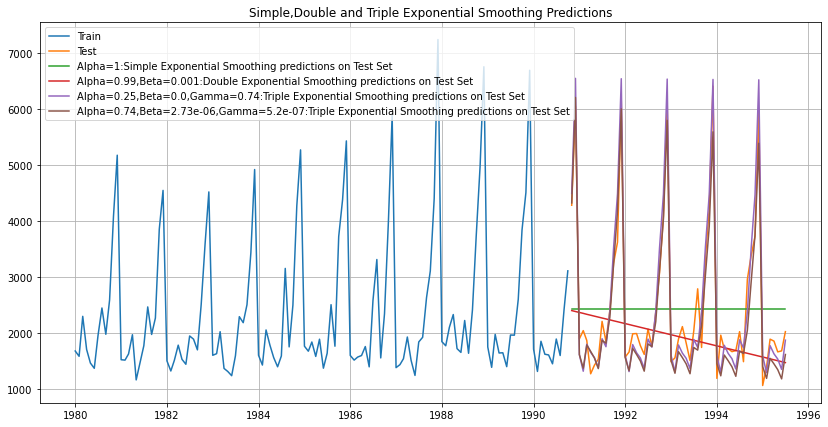

In [469]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [470]:
tes_am = (mean_squared_error(test.values,TES_predict_am.values,squared=False))

print('TES_am RMSE:',tes_am)

TES_am RMSE: 381.6552716385202


In [471]:
resultsDf6 = pd.DataFrame({'RMSE': tes_am}
                           ,index=['Triple Exponential Smoothening Model Multiplicative:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632
Triple Exponential Smoothening Model Additive:,366.859156
Triple Exponential Smoothening Model Multiplicative:,381.655272


# Check for Stationarity

Running Augmented Dicky Fuller Test with: 

Null Hypothesis:Time Series is not stationary.

Alternate Hypothesis:Time Series is stationary.

In [472]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


p > 0.05, thus is not a stationary series.

Text(0, 0.5, 'Sparkling')

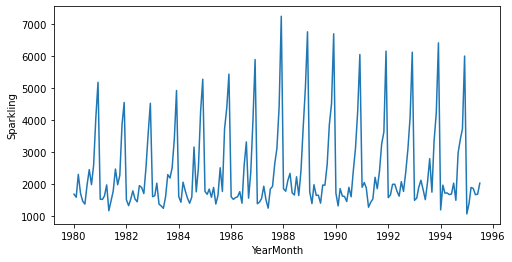

In [473]:
#Non differenced full data Time series
plt.figure(figsize=(8, 4))
plt.plot(df)
plt.xlabel('YearMonth')
plt.ylabel('Sparkling')

Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Sparkling')

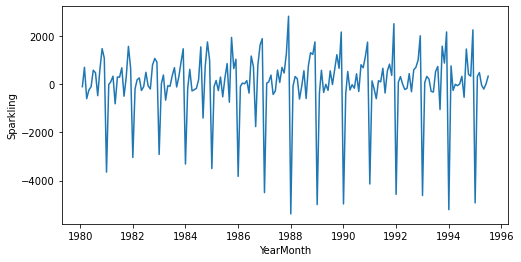

In [474]:
plt.figure(figsize=(8, 4))
x = df.diff(periods=1)
plt.plot(x)
plt.xlabel('YearMonth')
plt.ylabel('Sparkling')

We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.

# Model Building - Stationary Data

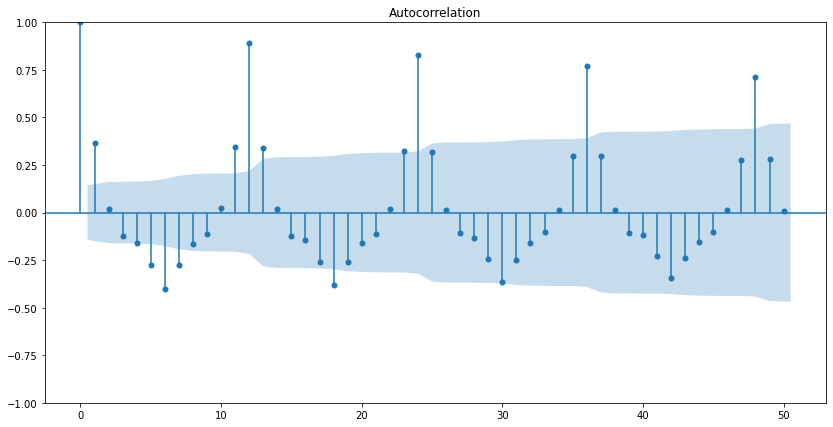

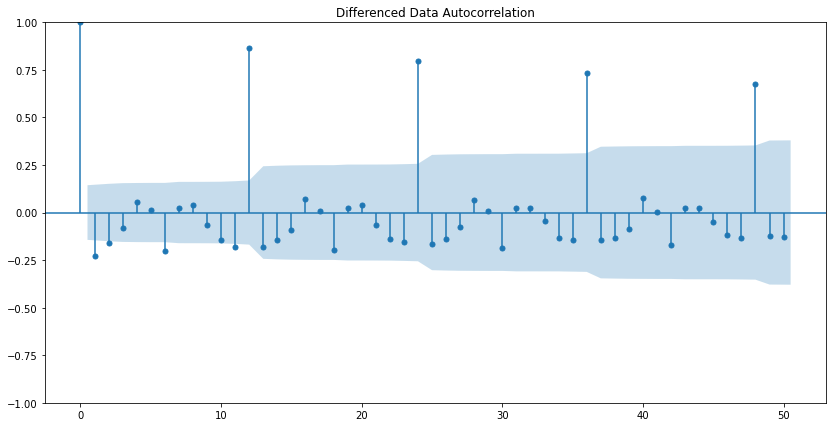

In [475]:
#Plotting the Autocorrelation function plots on the whole data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [476]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

In [477]:
import itertools
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [478]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [479]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [480]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [481]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [482]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.156
DF test p-value is 0.6922


In [483]:
#Using the log transformed series as there is variance in the data
train_sales_ts_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [484]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

In [485]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [486]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) - AIC:-95.16551608619329
ARIMA(2, 0, 0) - AIC:-99.68657925797993


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\1950219028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\1950219028.py:6: FutureWarning: The frame.append method is

ARIMA(3, 0, 0) - AIC:-97.69004308501584


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\1950219028.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [487]:
#Building AR model with best 'p' parameter 
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [488]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  53.843
Date:                Sun, 02 Jun 2024   AIC                            -99.687
Time:                        11:23:37   BIC                            -88.216
Sample:                    01-01-1980   HQIC                           -95.026
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3287      0.030    110.321      0.000       3.270       3.388
ar.L1          0.5503      0.125      4.406      0.000       0.306       0.795
ar.L2         -0.2206      0.153     -1.440      0.1

In [489]:
#Calculating RMSE for best AR model
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1988-01-01'), dynamic=True, full_results=True)

In [490]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [491]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [492]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1398.059


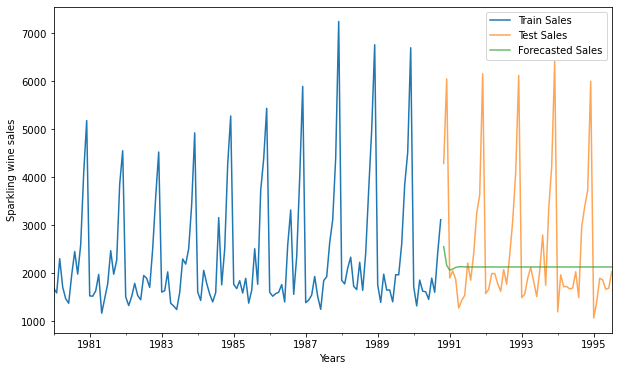

In [493]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling wine sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [494]:
resultsDf7 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model :'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632
Triple Exponential Smoothening Model Additive:,366.859156
Triple Exponential Smoothening Model Multiplicative:,381.655272
Best AR Model :,1398.059012


### ARMA Model

In [495]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [496]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC:-98.54420977119028


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

ARIMA(1, 0, 2) - AIC:-97.83219584233908


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramet

ARIMA(1, 0, 3) - AIC:-104.72240702781656


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) - AIC:-108.5506632162003


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

ARIMA(2, 0, 2) - AIC:-98.02999993412197


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramet

ARIMA(2, 0, 3) - AIC:-102.74253831300291


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) - AIC:-95.70080922663621


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

ARIMA(3, 0, 2) - AIC:-104.65540449484018
ARIMA(3, 0, 3) - AIC:-136.14197979363138


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\935708406.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [497]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-136.14198
3,"(2, 0, 1)",-108.550663
2,"(1, 0, 3)",-104.722407
7,"(3, 0, 2)",-104.655404
5,"(2, 0, 3)",-102.742538


In [498]:
#Building ARMA model with best p,q parameter
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

In [499]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.071
Date:                Sun, 02 Jun 2024   AIC                           -136.142
Time:                        11:23:44   BIC                           -113.202
Sample:                    01-01-1980   HQIC                          -126.821
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3330      0.012    281.869      0.000       3.310       3.356
ar.L1          0.7439      0.159      4.668      0.000       0.432       1.056
ar.L2          0.7133      0.277      2.570      0.0

In [500]:
#Calculating RMSE for best MA model 
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1988-01-01'), dynamic=True, full_results=True)

In [501]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [502]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [503]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1021.268


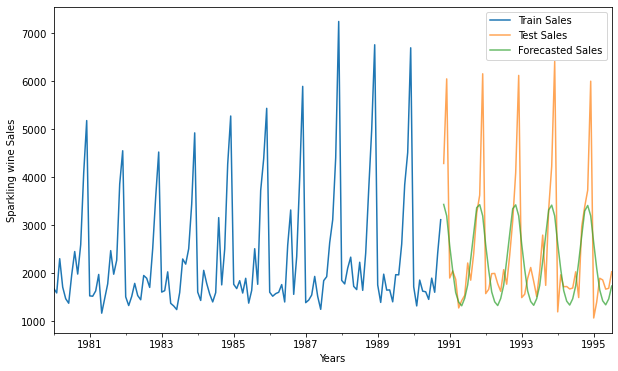

In [504]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [505]:
resultsDf8 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model:'])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632
Triple Exponential Smoothening Model Additive:,366.859156
Triple Exponential Smoothening Model Multiplicative:,381.655272
Best AR Model :,1398.059012
Best ARMA Model:,1021.268404


### ARIMA Model 

##### Auto ARIMA

In [506]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [507]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [508]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2228.4836604091106
ARIMA(0, 0, 1) - AIC:2204.8697988529457


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 0, 2) - AIC:2206.1112074350813
ARIMA(1, 0, 0) - AIC:2207.5021008952044
ARIMA(1, 0, 1) - AIC:2206.142158237968


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

ARIMA(1, 0, 2) - AIC:2207.163048180553
ARIMA(2, 0, 0) - AIC:2204.880721920144


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 0, 1) - AIC:2197.084442219536


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2) - AIC:2208.1208886931827


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [509]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 0, 1)",2197.084442
1,"(0, 0, 1)",2204.869799
6,"(2, 0, 0)",2204.880722
2,"(0, 0, 2)",2206.111207
4,"(1, 0, 1)",2206.142158
5,"(1, 0, 2)",2207.163048
3,"(1, 0, 0)",2207.502101
8,"(2, 0, 2)",2208.120889
0,"(0, 0, 0)",2228.48366


In [510]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,0,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1093.542
Date:                Sun, 02 Jun 2024   AIC                           2197.084
Time:                        11:23:47   BIC                           2211.422
Sample:                    01-01-1980   HQIC                          2202.910
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2379.9379    112.866     21.086      0.000    2158.725    2601.151
ar.L1          1.2114      0.135      8.991      0.000       0.947       1.475
ar.L2         -0.4998      0.124     -4.046      0.0

In [511]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [512]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1338.1398696745734


In [513]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
temp_resultsDf0

,RMSE
"ARIMA(2,1,2)",1338.13987


#### Manual ARIMA 

In [514]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [515]:
#Building ARIMA model with best parameters p,d,q

best_model = ARIMA(train_sales_ts_log,order = (2,1,2))
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [516]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  52.483
Date:                Sun, 02 Jun 2024   AIC                            -94.966
Time:                        11:23:48   BIC                            -80.667
Sample:                    01-01-1980   HQIC                           -89.156
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.010     -0.132      0.895      -0.021       0.018
ar.L2         -1.0000      0.005   -196.015      0.000      -1.010      -0.990
ma.L1          0.0062      0.112      0.056      0.9

In [517]:
#Calculating RMSE for best ARIMA model 
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1988-01-01'), dynamic=True, full_results=True)

In [518]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [519]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [520]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1843.421


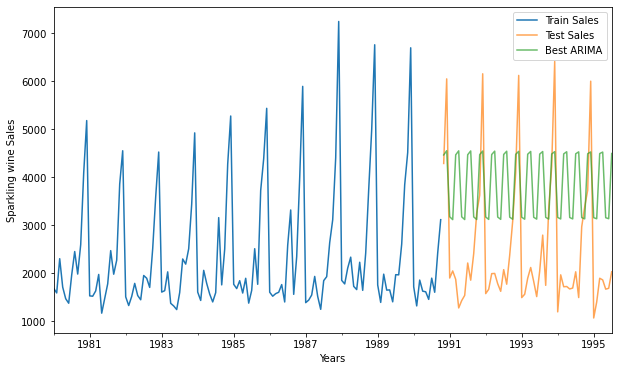

In [521]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Best ARIMA', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [522]:
resultsDf9 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : '])

pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8, resultsDf9])

,RMSE
Linear Regression Model,1374.550202
Simple Average Model :,1368.746717
Moving Average Model :,811.178937
Single Exponential Smoothening Model :,1363.702251
Double Exponential Smoothening Model,1472.253632
Triple Exponential Smoothening Model Additive:,366.859156
Triple Exponential Smoothening Model Multiplicative:,381.655272
Best AR Model :,1398.059012
Best ARMA Model:,1021.268404
Best ARIMA Model :,1843.420710


### SARIMA Model

### Auto SARIMA 

In [523]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

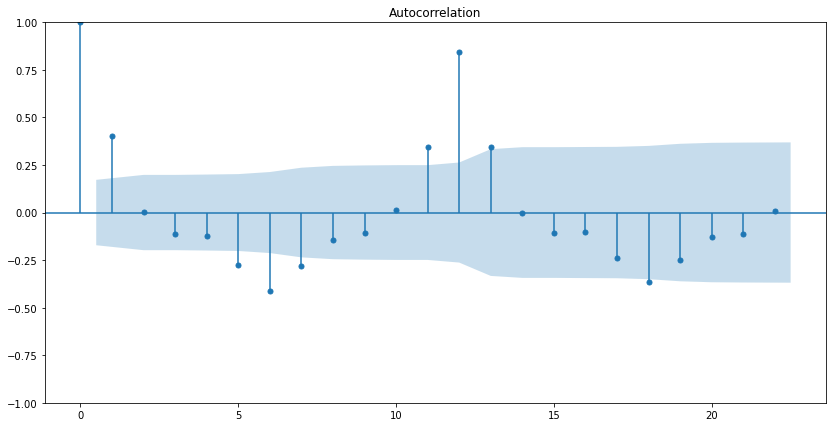

In [524]:
plot_acf(train['Sparkling'],alpha=0.05);

In [525]:
#Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [526]:
import itertools
p = q = range(0,3)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)


In [527]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [528]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2404.7639511633106


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2055.462777439794


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1779.5798224984749
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1772.136411524632


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1729.1645502639499


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1565.0952296953265


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1583.6861867479001


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1576.983424128126


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:1561.9139937277068
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2296.304904914704


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1970.240427460148


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1711.5819174149528


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1775.1721403406627


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1714.993418692948


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:1547.9528892124686


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:1581.2779687362647


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:1576.1150597132948


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:1547.3185616109563


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:2239.464033456459


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:1933.6715517004998


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:1685.6969158474292


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:1769.052049184923


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1700.7851017378339


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:1535.130923551413


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:1581.9170899903943


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:1577.5184824888672


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:1534.0725127721857
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:2226.3640191031145


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1929.4195158211912


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:1697.3522779395116


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1754.2727821599358


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1729.4238607958005


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:1562.3070655459858


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:1568.1444613961614


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:1562.5801346470791


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:1561.8970759835606
SARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:2208.613293182497


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1913.6206823248567


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:1682.3127972204566


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1756.2778764831824


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1713.733427384786


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:1546.3363013743715


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:1566.8062400950523


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1560.9524186810543


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:1546.3710396945673


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:2165.39939663747


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1916.996056409243


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:1642.0798786227022


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1752.5709435689578


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1705.5421921053683


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:1539.9553001758782


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:1568.8017938348542


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:1562.95569987141


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:1534.4277002899298
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:2210.640354888143


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1929.8454041566072


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:1698.75162442324


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:1741.134030356699


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1717.497996894851


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:1563.8179709891942


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:1555.129845925646


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:1550.2512984333734


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:1549.1668982650876


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:2183.7199221795686


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:1933.8216625221962


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:1727.0734399055543


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1738.257273937337


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1720.31046105221


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:1551.8190001316152


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:1554.5172680446574


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:1548.821744768032


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:1548.3519903269353


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:2166.964123045688


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:1891.5653474013652


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:1643.923169902604


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:1740.1519676409239


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1703.3709842301414


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:1536.3025878905437


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:1558.115500184058


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:1550.817887599344


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:1536.2870140547147


C:\Users\AISHWARYA HARIHARAN\AppData\Local\Temp\ipykernel_16024\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [529]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 0, 2)","(2, 0, 2, 12)",1534.072513
53,"(1, 0, 2)","(2, 0, 2, 12)",1534.4277
23,"(0, 0, 2)","(1, 0, 2, 12)",1535.130924
80,"(2, 0, 2)","(2, 0, 2, 12)",1536.287014
77,"(2, 0, 2)","(1, 0, 2, 12)",1536.302588


In [530]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 0, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(0, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -760.036
Date:                            Sun, 02 Jun 2024   AIC                           1534.073
Time:                                    11:26:06   BIC                           1552.516
Sample:                                         0   HQIC                          1541.543
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1863      0.101      1.840      0.066      -0.012       0.385
ma.L2         -0.1082      0.120   

In [531]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_SARIMA = results_auto_SARIMA_12.forecast(steps=len(test))

In [532]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA,squared=False)
print(rmse)

641.082078094194


#### Manual SARIMA Model 

In [533]:
#SARIMA Model building to estimate best parameters
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [534]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [535]:
#Building SARIMA model with the best parameters 
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 1, 2),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [536]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 145.652
Date:                              Sun, 02 Jun 2024   AIC                           -279.305
Time:                                      11:26:08   BIC                           -262.732
Sample:                                  01-01-1980   HQIC                          -272.576
                                       - 10-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7265      0.393     -1.851      0.064      -1.496       0.043
ma.L1         -0.10

In [537]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1988-01-01'), dynamic=True, full_results=True)

In [538]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [539]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [540]:
testCopy

,Sparkling,sales_ts_forecasted
YearMonth,,
1990-11-01,4286,4251.755283
1990-12-01,6047,6317.320340
1991-01-01,1902,1646.354562
1991-02-01,2049,1429.038739
1991-03-01,1874,1825.213527
1991-04-01,1279,1714.538475
1991-05-01,1432,1595.061632
1991-06-01,1540,1419.477409
1991-07-01,2214,1915.441996


In [541]:
# Compute the root mean square error
mse = ((testCopy['Sparkling'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 303.552


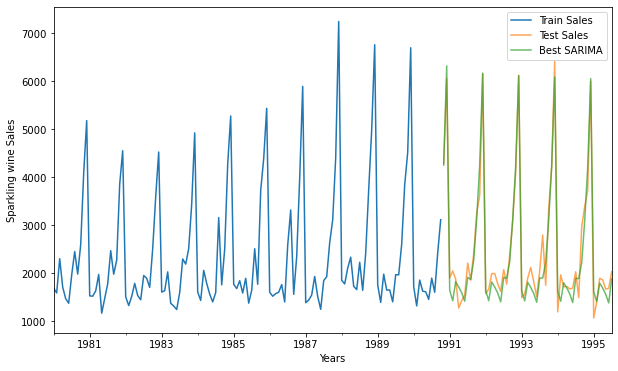

In [542]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Best SARIMA', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [543]:
resultsDf10 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : '])

a = pd.concat([resultsDf,resultsDf1,resultsDf2, resultsDf3, resultsDf4, resultsDf5, resultsDf6, resultsDf7, resultsDf8, resultsDf9, resultsDf10])

final_results_df = a.round(2)

print(final_results_df)

                                                       RMSE
Linear Regression Model                             1374.55
Simple Average Model :                              1368.75
Moving Average Model :                               811.18
Single Exponential Smoothening Model :              1363.70
Double Exponential Smoothening Model                1472.25
Triple Exponential Smoothening Model Additive:       366.86
Triple Exponential Smoothening Model Multiplica...   381.66
Best AR Model :                                     1398.06
Best ARMA Model:                                    1021.27
Best ARIMA Model :                                  1843.42
Best SARIMA Model :                                  303.55


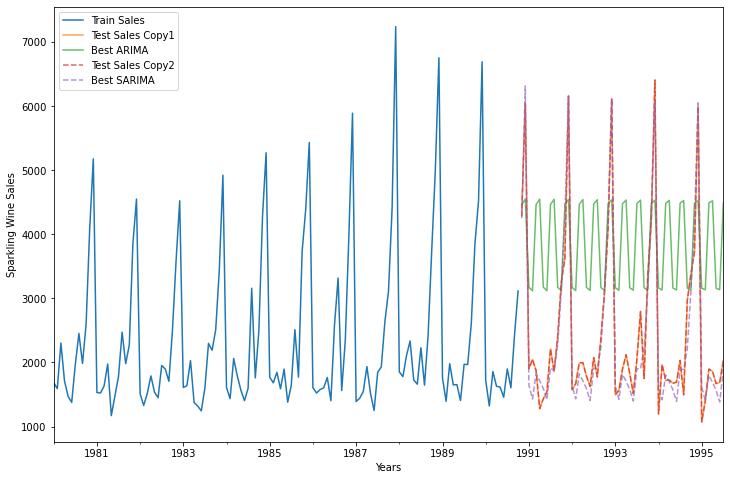

In [544]:
import matplotlib.pyplot as plt

# Combined Plot
axis = train['Sparkling'].plot(label='Train Sales', figsize=(12, 8))

# Plot data from testCopy1
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales Copy1', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Best ARIMA', alpha=0.7)

# Plot data from testCopy
testCopy['Sparkling'].plot(ax=axis, label='Test Sales Copy2', alpha=0.7, linestyle='--')
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Best SARIMA', alpha=0.7, linestyle='--')

# Set labels and legend
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')

# Show plot
plt.show()
plt.close()


In [545]:
#Forecast sales using the best fit SARIMA model as per RMSE 
# Get forecast 36 steps (3 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [546]:
n_steps = 12
idx = pd.date_range(start='1995-08-01',end='1996-07-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1995-08-01,4251.755283,3140.412446,5756.384964,3140.412446,5756.384964
1995-09-01,6317.320340,4646.596287,8588.767738,4646.596287,8588.767738
1995-10-01,1646.354562,1210.695607,2238.781844,1210.695607,2238.781844
1995-11-01,1429.038739,1048.172467,1948.297424,1048.172467,1948.297424
1995-12-01,1825.213527,1337.934223,2489.961287,1337.934223,2489.961287


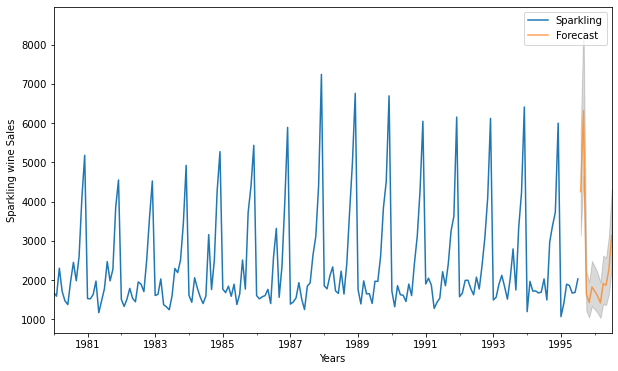

In [547]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(10, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling wine Sales')
plt.legend(loc='best')
plt.show()